In [346]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from scipy.optimize import curve_fit
from scipy.stats import norm

In [505]:
# Function Definitions

# Curve fitting part 
# define the true objective function ----------------------------------------------
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

def objectiveSig(x, a, b):
    return 1. / (1 + np.exp( -((x-a)/b)))

def objectiveSig2(x, a, b, c, d):
    return 1. / (1 + np.exp(-((x*-a)/b)) + c * (np.exp(-((x-a)/b))) + d * (np.exp(-((x-a)/d))))

def objectiveSig3(x, a, b, c):
    return (a / (1 + np.exp((-b)*(x-c))))

def objectiveSig4(x, a, b, c):
    return (a * (1 - np.exp(-(x-c)/b)))

def psyFunction(x,mu,sd,k,offset):
    yhat = norm.cdf(x,mu, sd) * k + offset
    return yhat 

def func5(t,a,b,c,d,e,f):
        return a*pow(t,5)+b*pow(t,4)+c*pow(t,3)+d*pow(t,2)+e*t+f
    
def sigmoidFunc(x):
    1/(1 + np.exp(-x)) 

def objectivePol(x, a,b,c):
    return a*pow(x,2)+b*x+c
# --------------------------------------------------------------------------------------

def Create2DList(rows,cols,initVal):
    answrs=[]
    for j in range(rows):
        column = []
        for i in range(cols):
            column.append(initVal)
        answrs.append(column)
    return answrs


def Average(lst): 
    
    # Make sure no number 2s are included in the average
    if 2 in lst:
        lst.remove(2.0) 
    
    avrg = 0.0
    try:
        avrg = np.round(sum(lst) / len(lst),3)
    except Exception as e:
#         print(e)
        avrg = np.nan
    
    return avrg

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [151]:
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
path = "D:/OneDrive/Documents/Projects/VisualProprioceptiveGithub/Visual-Proprioceptive/VisualProprioceptive_Data/"

In [152]:
# Analysis of the answers given after movement to the target was made (i.e. visual-proprioceptive condition)
files = os.listdir(path)

dataFrame = None 
correct = 0 #np.ones(len(files))
responseVal = 0

for i in range(len(files)):
    
    filez = "Answer" in files[i] 
        
    if filez:
        
        data = pd.read_csv(path + files[i],sep=':', header=[0,1,2])
#         data = pd.read_fwf(path + files[i],sep=':', header=[0,1,2])

#----------------------------------------------------------------------------
        fName = files[i]
        fNameS = fName.split('_')
#         print(fNameS)
#         print(float(fNameS[6]))
        
        try:
            propVal = float(fNameS[6])
        except Exception as e:
            print(e)
            replText = fNameS[6].replace("," , ".")
            print(replText)
            propVal = float(replText)
    
        targPos = data.iloc[0]["Name" == "Target_Position"]
        stiPos = data.iloc[1]["Name" == "Stimulus_Position"]
        reHPos = data.iloc[2]["Name" == "RealHand_Position"]
        stzPos = data.iloc[3]["Name" == "StartZone_Position"]
        resPos = data.iloc[4]["Name" == "Response"]
        
        if "Y" in resPos:
            responseVal = 1
        else:
            responseVal = 0
        
        tp = targPos.split(',')
        sp = stiPos.split(',')
        rep = reHPos.split(',')
        szP = stzPos.split(',')

        tpf =(float(tp[2]))
        spf = (float(sp[2]))
        rpf = (float(rep[2]))
        szf = (float(szP[2]))

        diffPos = np.absolute(tpf-spf)
        realVsVirtHand = np.absolute(rpf-spf)

#         print(round(result,4))
#         print(resPos)
    
    #-------------------------------------------------
    # if the proprioceptive value is positive and the answer is yes, then that is incorrect 
    # if the proprioceptive value is negative and the answer is yes, then that is correct 

        if propVal > 0.0 and 'Y' in resPos:
            correct = 0
        if propVal < 0.0 and 'Y' in resPos:
            correct = 1
        if propVal > 0.0 and 'N'in resPos:
            correct = 1
        if propVal < 0.0 and 'N' in resPos:
            correct = 0
        if propVal == 0.0:
            correct = 2

    #-------------------------------------------------
    
        rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resPos,correct))
        tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])
        
        tmpValues.insert(0, "Trial", fNameS[7][0] , True)
        tmpValues.insert(0, "Participant_ID", fNameS[2] , True)
        
        if dataFrame is None:
            dataFrame = tmpValues
        else:
            dataFrame = pd.concat((dataFrame, tmpValues)) 
    
#----------------------------------------------------------------------------       

['1602405451', 'Answer', '379d850213', 'Trg', '0', 'Prop', '0.05', '0.txt']
['1602405455', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0', '1.txt']
['1602405460', 'Answer', '379d850213', 'Trg', '0', 'Prop', '-0.025', '2.txt']
['1602405463', 'Answer', '379d850213', 'Trg', '-0.2', 'Prop', '-0.05', '3.txt']
['1602405466', 'Answer', '379d850213', 'Trg', '-0.2', 'Prop', '0.025', '4.txt']
['1602405472', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0.1', '5.txt']
['1602795658', 'Answer', '379d850213', 'Trg', '0', 'Prop', '0.05', '0.txt']
['1602795663', 'Answer', '379d850213', 'Trg', '0', 'Prop', '-0.025', '1.txt']
['1602795667', 'Answer', '379d850213', 'Trg', '-0.2', 'Prop', '-0.05', '2.txt']
['1602795670', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0.1', '3.txt']
['1602795673', 'Answer', '379d850213', 'Trg', '-0.2', 'Prop', '0.025', '4.txt']
['1602795678', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0', '5.txt']
['1602795679', 'Answer', '379d850213', 'Trg', '0.2', 'Prop', '0', '5

['1603192030', 'Answer', '4f7f802b39', 'Trg', '0', 'Prop', '-0.1', '34.txt']
['1603465803', 'Answer', '08727a345f', 'Trg', '0', 'Prop', '0.1', '0.txt']
['1603465881', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '0.025', '1.txt']
['1603465900', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '0.025', '1.txt']
['1603465906', 'Answer', '08727a345f', 'Trg', '0.2', 'Prop', '-0.025', '3.txt']
['1603465907', 'Answer', '08727a345f', 'Trg', '0.2', 'Prop', '-0.025', '3.txt']
['1603465915', 'Answer', '08727a345f', 'Trg', '0', 'Prop', '-0.05', '4.txt']
['1603465919', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '-0.1', '5.txt']
['1603465924', 'Answer', '08727a345f', 'Trg', '0.2', 'Prop', '0', '6.txt']
['1603465928', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '0.1', '7.txt']
['1603465933', 'Answer', '08727a345f', 'Trg', '0', 'Prop', '-0.1', '8.txt']
['1603465940', 'Answer', '08727a345f', 'Trg', '-0.2', 'Prop', '0.025', '9.txt']
['1603465946', 'Answer', '08727a345f', 'Trg', '0', 'Prop', '-0.

['1608984805', 'Answer', 'ea31d92230', 'Trg', '0,2', 'Prop', '-0,1', '21.txt']
could not convert string to float: '-0,1'
-0.1
['1608984808', 'Answer', 'ea31d92230', 'Trg', '0', 'Prop', '-0,05', '22.txt']
could not convert string to float: '-0,05'
-0.05
['1608984811', 'Answer', 'ea31d92230', 'Trg', '-0,2', 'Prop', '-0,025', '23.txt']
could not convert string to float: '-0,025'
-0.025
['1608984815', 'Answer', 'ea31d92230', 'Trg', '-0,2', 'Prop', '0,025', '24.txt']
could not convert string to float: '0,025'
0.025
['1608984820', 'Answer', 'ea31d92230', 'Trg', '0,2', 'Prop', '0,025', '25.txt']
could not convert string to float: '0,025'
0.025
['1608984822', 'Answer', 'ea31d92230', 'Trg', '-0,2', 'Prop', '-0,025', '26.txt']
could not convert string to float: '-0,025'
-0.025
['1608984828', 'Answer', 'ea31d92230', 'Trg', '0', 'Prop', '0,1', '27.txt']
could not convert string to float: '0,1'
0.1
['1608984830', 'Answer', 'ea31d92230', 'Trg', '-0,2', 'Prop', '0,05', '28.txt']
could not convert str

['1609613185', 'Answer', '83ea3b75be', 'Trg', '-0.2', 'Prop', '0.025', '11.txt']
['1609613199', 'Answer', '83ea3b75be', 'Trg', '0.2', 'Prop', '0.1', '12.txt']
['1609613210', 'Answer', '83ea3b75be', 'Trg', '0.2', 'Prop', '0', '13.txt']
['1609613217', 'Answer', '83ea3b75be', 'Trg', '0.2', 'Prop', '0.1', '14.txt']
['1609613232', 'Answer', '83ea3b75be', 'Trg', '-0.2', 'Prop', '-0.05', '15.txt']
['1609613240', 'Answer', '83ea3b75be', 'Trg', '0.2', 'Prop', '0.05', '16.txt']
['1609613248', 'Answer', '83ea3b75be', 'Trg', '0', 'Prop', '0', '17.txt']
['1609613253', 'Answer', '83ea3b75be', 'Trg', '0', 'Prop', '0.05', '18.txt']
['1609613259', 'Answer', '83ea3b75be', 'Trg', '-0.2', 'Prop', '-0.025', '19.txt']
['1609613265', 'Answer', '83ea3b75be', 'Trg', '0', 'Prop', '0.025', '20.txt']
['1609613269', 'Answer', '83ea3b75be', 'Trg', '0', 'Prop', '0.025', '21.txt']
['1609613278', 'Answer', '83ea3b75be', 'Trg', '0', 'Prop', '-0.025', '22.txt']
['1609613282', 'Answer', '83ea3b75be', 'Trg', '0.2', 'Prop'

['1609697922', 'Answer', '61325914d1', 'Trg', '0', 'Prop', '0', '26.txt']
['1609697923', 'Answer', '61325914d1', 'Trg', '-0,2', 'Prop', '-0,025', '27.txt']
could not convert string to float: '-0,025'
-0.025
['1609697925', 'Answer', '61325914d1', 'Trg', '-0,2', 'Prop', '-0,025', '27.txt']
could not convert string to float: '-0,025'
-0.025
['1609697928', 'Answer', '61325914d1', 'Trg', '0', 'Prop', '-0,025', '28.txt']
could not convert string to float: '-0,025'
-0.025
['1609697929', 'Answer', '61325914d1', 'Trg', '0', 'Prop', '-0,025', '28.txt']
could not convert string to float: '-0,025'
-0.025
['1609697934', 'Answer', '61325914d1', 'Trg', '0', 'Prop', '-0,05', '29.txt']
could not convert string to float: '-0,05'
-0.05
['1609697935', 'Answer', '61325914d1', 'Trg', '-0,2', 'Prop', '-0,05', '30.txt']
could not convert string to float: '-0,05'
-0.05
['1609697948', 'Answer', '61325914d1', 'Trg', '-0,2', 'Prop', '-0,05', '30.txt']
could not convert string to float: '-0,05'
-0.05
['1609697953'

['1610107251', 'Answer', 'd55f5603f6', 'Trg', '0', 'Prop', '0.1', '30.txt']
['1610107255', 'Answer', 'd55f5603f6', 'Trg', '-0.2', 'Prop', '-0.025', '31.txt']
['1610107258', 'Answer', 'd55f5603f6', 'Trg', '0.2', 'Prop', '-0.05', '32.txt']
['1610107264', 'Answer', 'd55f5603f6', 'Trg', '0.2', 'Prop', '0', '33.txt']
['1610107265', 'Answer', 'd55f5603f6', 'Trg', '0.2', 'Prop', '-0.1', '34.txt']
['1610107267', 'Answer', 'd55f5603f6', 'Trg', '0.2', 'Prop', '-0.1', '34.txt']
['1610142858', 'Answer', '453bf8b442', 'Trg', '0.2', 'Prop', '0.025', '0.txt']
['1610142885', 'Answer', '453bf8b442', 'Trg', '-0.2', 'Prop', '-0.05', '2.txt']
['1610142904', 'Answer', '453bf8b442', 'Trg', '-0.2', 'Prop', '0', '3.txt']
['1610142914', 'Answer', '453bf8b442', 'Trg', '-0.2', 'Prop', '-0.025', '4.txt']
['1610161499', 'Answer', 'df31100188', 'Trg', '-0.2', 'Prop', '-0.1', '0.txt']
['1610195553', 'Answer', 'ff97977261', 'Trg', '0', 'Prop', '0,1', '0.txt']
could not convert string to float: '0,1'
0.1
['1610195587'

['1610227596', 'Answer', 'a7cae9c0ad', 'Trg', '0', 'Prop', '-0,05', '10.txt']
could not convert string to float: '-0,05'
-0.05
['1610227599', 'Answer', 'a7cae9c0ad', 'Trg', '-0,2', 'Prop', '0', '11.txt']
['1610227600', 'Answer', 'a7cae9c0ad', 'Trg', '-0,2', 'Prop', '0,1', '12.txt']
could not convert string to float: '0,1'
0.1
['1610227602', 'Answer', 'a7cae9c0ad', 'Trg', '-0,2', 'Prop', '0,1', '12.txt']
could not convert string to float: '0,1'
0.1
['1610227615', 'Answer', 'a7cae9c0ad', 'Trg', '0', 'Prop', '0,1', '13.txt']
could not convert string to float: '0,1'
0.1
['1610227616', 'Answer', 'a7cae9c0ad', 'Trg', '-0,2', 'Prop', '0,05', '14.txt']
could not convert string to float: '0,05'
0.05
['1610227617', 'Answer', 'a7cae9c0ad', 'Trg', '-0,2', 'Prop', '-0,025', '15.txt']
could not convert string to float: '-0,025'
-0.025
['1610227620', 'Answer', 'a7cae9c0ad', 'Trg', '-0,2', 'Prop', '-0,025', '15.txt']
could not convert string to float: '-0,025'
-0.025
['1610227623', 'Answer', 'a7cae9c0

['1610444462', 'Answer', 'b980e7636c', 'Trg', '0,2', 'Prop', '-0,1', '24.txt']
could not convert string to float: '-0,1'
-0.1
['1610444463', 'Answer', 'b980e7636c', 'Trg', '0,2', 'Prop', '-0,1', '24.txt']
could not convert string to float: '-0,1'
-0.1
['1610444466', 'Answer', 'b980e7636c', 'Trg', '0,2', 'Prop', '-0,05', '25.txt']
could not convert string to float: '-0,05'
-0.05
['1610444469', 'Answer', 'b980e7636c', 'Trg', '0,2', 'Prop', '-0,05', '26.txt']
could not convert string to float: '-0,05'
-0.05
['1610444477', 'Answer', 'b980e7636c', 'Trg', '-0,2', 'Prop', '-0,1', '27.txt']
could not convert string to float: '-0,1'
-0.1
['1610444478', 'Answer', 'b980e7636c', 'Trg', '-0,2', 'Prop', '-0,1', '27.txt']
could not convert string to float: '-0,1'
-0.1
['1610444481', 'Answer', 'b980e7636c', 'Trg', '0', 'Prop', '0,05', '28.txt']
could not convert string to float: '0,05'
0.05
['1610444486', 'Answer', 'b980e7636c', 'Trg', '-0,2', 'Prop', '-0,05', '29.txt']
could not convert string to flo

['1610670791', 'Answer', 'eb090bd291', 'Trg', '-0.2', 'Prop', '-0.05', '33.txt']
['1610670795', 'Answer', 'eb090bd291', 'Trg', '0.2', 'Prop', '0', '34.txt']
['1610745586', 'Answer', 'c3cb99fa4d', 'Trg', '-0,2', 'Prop', '0,1', '0.txt']
could not convert string to float: '0,1'
0.1
['1610745603', 'Answer', 'c3cb99fa4d', 'Trg', '-0,2', 'Prop', '0,05', '1.txt']
could not convert string to float: '0,05'
0.05
['1610745608', 'Answer', 'c3cb99fa4d', 'Trg', '-0,2', 'Prop', '-0,025', '2.txt']
could not convert string to float: '-0,025'
-0.025
['1610772678', 'Answer', 'fd4c146f0f', 'Trg', '0.2', 'Prop', '-0.05', '0.txt']
['1610772757', 'Answer', 'fd4c146f0f', 'Trg', '0', 'Prop', '0.1', '1.txt']
['1610772776', 'Answer', 'fd4c146f0f', 'Trg', '0.2', 'Prop', '0.05', '2.txt']
['1610772778', 'Answer', 'fd4c146f0f', 'Trg', '-0.2', 'Prop', '0.1', '3.txt']
['1610772788', 'Answer', 'fd4c146f0f', 'Trg', '-0.2', 'Prop', '0.1', '3.txt']
['1610772789', 'Answer', 'fd4c146f0f', 'Trg', '-0.2', 'Prop', '-0.025', '4

['1610879436', 'Answer', '53b66b850e', 'Trg', '-0,2', 'Prop', '0,025', '16.txt']
could not convert string to float: '0,025'
0.025
['1610879440', 'Answer', '53b66b850e', 'Trg', '0,2', 'Prop', '-0,1', '17.txt']
could not convert string to float: '-0,1'
-0.1
['1610879444', 'Answer', 'a8d792dabc', 'Trg', '-0,2', 'Prop', '0,05', '21.txt']
could not convert string to float: '0,05'
0.05
['1610879444', 'Answer', 'a8d792dabc', 'Trg', '0,2', 'Prop', '0,05', '22.txt']
could not convert string to float: '0,05'
0.05
['1610879450', 'Answer', 'a8d792dabc', 'Trg', '0,2', 'Prop', '0,05', '22.txt']
could not convert string to float: '0,05'
0.05
['1610879452', 'Answer', 'a8d792dabc', 'Trg', '0', 'Prop', '-0,1', '23.txt']
could not convert string to float: '-0,1'
-0.1
['1610879455', 'Answer', 'a8d792dabc', 'Trg', '0', 'Prop', '-0,025', '24.txt']
could not convert string to float: '-0,025'
-0.025
['1610879458', 'Answer', 'a8d792dabc', 'Trg', '-0,2', 'Prop', '0,05', '25.txt']
could not convert string to flo

['1610984030', 'Answer', 'caa47ef745', 'Trg', '-0.2', 'Prop', '0', '27.txt']
['1610984034', 'Answer', 'caa47ef745', 'Trg', '0.2', 'Prop', '-0.1', '28.txt']
['1610984041', 'Answer', 'caa47ef745', 'Trg', '0.2', 'Prop', '0.1', '29.txt']
['1610984045', 'Answer', 'caa47ef745', 'Trg', '0', 'Prop', '-0.025', '30.txt']
['1610984051', 'Answer', 'caa47ef745', 'Trg', '0', 'Prop', '0', '31.txt']
['1610984055', 'Answer', 'caa47ef745', 'Trg', '0.2', 'Prop', '0.05', '32.txt']
['1610984062', 'Answer', 'caa47ef745', 'Trg', '0.2', 'Prop', '0.1', '33.txt']
['1610984070', 'Answer', 'caa47ef745', 'Trg', '0.2', 'Prop', '-0.1', '34.txt']
['1610996602', 'Answer', '19523bffff', 'Trg', '-0.2', 'Prop', '0.025', '0.txt']
['1610996628', 'Answer', '19523bffff', 'Trg', '-0.2', 'Prop', '0.05', '1.txt']
['1611004107', 'Answer', '95a0110e04', 'Trg', '0', 'Prop', '0,1', '0.txt']
could not convert string to float: '0,1'
0.1
['1611004192', 'Answer', '95a0110e04', 'Trg', '-0,2', 'Prop', '0,025', '1.txt']
could not convert 

['1611092581', 'Answer', 'a164fe3f96', 'Trg', '-0,2', 'Prop', '0,025', '2.txt']
could not convert string to float: '0,025'
0.025
['1611092591', 'Answer', 'a164fe3f96', 'Trg', '0,2', 'Prop', '-0,05', '3.txt']
could not convert string to float: '-0,05'
-0.05
['1611092612', 'Answer', 'a164fe3f96', 'Trg', '-0,2', 'Prop', '0,1', '4.txt']
could not convert string to float: '0,1'
0.1
['1611092633', 'Answer', 'a164fe3f96', 'Trg', '0,2', 'Prop', '-0,1', '5.txt']
could not convert string to float: '-0,1'
-0.1
['1611092634', 'Answer', 'a164fe3f96', 'Trg', '0,2', 'Prop', '-0,1', '5.txt']
could not convert string to float: '-0,1'
-0.1
['1611092656', 'Answer', 'a164fe3f96', 'Trg', '-0,2', 'Prop', '0,025', '6.txt']
could not convert string to float: '0,025'
0.025
['1611092670', 'Answer', 'a164fe3f96', 'Trg', '0', 'Prop', '-0,025', '7.txt']
could not convert string to float: '-0,025'
-0.025
['1611092676', 'Answer', 'a164fe3f96', 'Trg', '-0,2', 'Prop', '-0,1', '8.txt']
could not convert string to float

['1611123702', 'Answer', 'a7fd6a453c', 'Trg', '0', 'Prop', '0.1', '20.txt']
['1611123703', 'Answer', 'a7fd6a453c', 'Trg', '0', 'Prop', '0.1', '20.txt']
['1611123714', 'Answer', 'a7fd6a453c', 'Trg', '0', 'Prop', '0', '21.txt']
['1611123715', 'Answer', 'a7fd6a453c', 'Trg', '0', 'Prop', '0', '21.txt']
['1611123725', 'Answer', 'a7fd6a453c', 'Trg', '0.2', 'Prop', '-0.1', '22.txt']
['1611123730', 'Answer', 'a7fd6a453c', 'Trg', '0.2', 'Prop', '-0.025', '23.txt']
['1611123737', 'Answer', 'a7fd6a453c', 'Trg', '-0.2', 'Prop', '0.05', '24.txt']
['1611123740', 'Answer', 'a7fd6a453c', 'Trg', '-0.2', 'Prop', '0.1', '25.txt']
['1611123741', 'Answer', 'a7fd6a453c', 'Trg', '-0.2', 'Prop', '0.1', '25.txt']
['1611123742', 'Answer', 'a7fd6a453c', 'Trg', '-0.2', 'Prop', '-0.025', '26.txt']
['1611123745', 'Answer', 'a7fd6a453c', 'Trg', '-0.2', 'Prop', '-0.025', '26.txt']
['1611123746', 'Answer', 'a7fd6a453c', 'Trg', '-0.2', 'Prop', '0.025', '27.txt']
['1611123751', 'Answer', 'a7fd6a453c', 'Trg', '-0.2', 'Pr

['1611170212', 'Answer', 'd856850174', 'Trg', '-0.2', 'Prop', '0.05', '12.txt']
['1611170217', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '-0.025', '13.txt']
['1611170222', 'Answer', 'd856850174', 'Trg', '0', 'Prop', '0.1', '14.txt']
['1611170225', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '-0.05', '15.txt']
['1611170234', 'Answer', 'd856850174', 'Trg', '0', 'Prop', '-0.025', '16.txt']
['1611170239', 'Answer', 'd856850174', 'Trg', '-0.2', 'Prop', '0.05', '17.txt']
['1611170242', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '0.1', '18.txt']
['1611170243', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '-0.1', '19.txt']
['1611170243', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '0.1', '18.txt']
['1611170247', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '-0.1', '19.txt']
['1611170247', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '0', '20.txt']
['1611170250', 'Answer', 'd856850174', 'Trg', '0.2', 'Prop', '0', '20.txt']
['1611170253', 'Answer', 'd856850174', 'Trg', '0', 'Prop',

['1611699529', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '-0.1', '2.txt']
['1611699535', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '0.025', '3.txt']
['1611699540', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '0.1', '4.txt']
['1611699545', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '-0.1', '5.txt']
['1611699569', 'Answer', 'b53c727b6e', 'Trg', '0.2', 'Prop', '-0.05', '9.txt']
['1611699572', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '0.05', '10.txt']
['1611699573', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '0', '11.txt']
['1611699575', 'Answer', 'b53c727b6e', 'Trg', '0.2', 'Prop', '0.025', '8.txt']
['1611699576', 'Answer', 'b53c727b6e', 'Trg', '0', 'Prop', '0', '11.txt']
['1611699579', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '0.1', '12.txt']
['1611699584', 'Answer', 'b53c727b6e', 'Trg', '-0.2', 'Prop', '0.05', '13.txt']
['1611699584', 'Answer', 'b53c727b6e', 'Trg', '0.2', 'Prop', '0', '7.txt']
['1611699588', 'Answer', 'b53c727b6e', 'Trg', '0.2', 'Prop', '0.1', '1

['1612158534', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '0', '10.txt']
['1612158550', 'Answer', '3503cca04a', 'Trg', '-0.2', 'Prop', '-0.1', '11.txt']
['1612158554', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '-0.1', '12.txt']
['1612158557', 'Answer', '3503cca04a', 'Trg', '-0.2', 'Prop', '0.1', '13.txt']
['1612158562', 'Answer', '3503cca04a', 'Trg', '-0.2', 'Prop', '-0.05', '14.txt']
['1612158566', 'Answer', '3503cca04a', 'Trg', '0', 'Prop', '-0.1', '15.txt']
['1612158571', 'Answer', '3503cca04a', 'Trg', '-0.2', 'Prop', '-0.025', '16.txt']
['1612158577', 'Answer', '3503cca04a', 'Trg', '0', 'Prop', '0.025', '17.txt']
['1612158583', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '-0.05', '18.txt']
['1612158587', 'Answer', '3503cca04a', 'Trg', '-0.2', 'Prop', '0', '19.txt']
['1612158592', 'Answer', '3503cca04a', 'Trg', '0.2', 'Prop', '0', '20.txt']
['1612158598', 'Answer', '3503cca04a', 'Trg', '-0.2', 'Prop', '-0.025', '21.txt']
['1612158605', 'Answer', '3503cca04a', 'Trg', '0.2', 

['1612258240', 'Answer', '3e5b810325', 'Trg', '0', 'Prop', '-0.025', '4.txt']
['1612258248', 'Answer', '3e5b810325', 'Trg', '-0.2', 'Prop', '-0.05', '5.txt']
['1612258251', 'Answer', '3e5b810325', 'Trg', '-0.2', 'Prop', '-0.05', '6.txt']


In [195]:
# dataFrame

In [153]:
# Get proprioceptive values 
proprioceptiveVals = dataFrame['ProprioceptiveVal'].unique()
proprioceptiveVals.sort()
print(proprioceptiveVals)

# Get probabilities for perceiving the real hand ahead of the virtual hand for each of the proprioceptive targets
propVals = dataFrame["ProprioceptiveVal"].tolist()
answers = dataFrame["Answer"].tolist()
probabilityAhead1 = []
for i in answers:
    if i == 1:
        probabilityAhead1.append(i)
print("Probability 1 the real hand was ahead: ", np.round(len(probabilityAhead1)/len(answers),3))


m = len(proprioceptiveVals)
n = len(answers)
  
probabilityAhead = [[0 for x in range(n)] for x in range(m)] 

for i in answers:
    if i == 1:
        if propVals[i] == proprioceptiveVals[0]: 
            probabilityAhead[0][i] = i
        if propVals[i] == proprioceptiveVals[1]: 
            probabilityAhead[1][i] = i
        if propVals[i] == proprioceptiveVals[2]: 
            probabilityAhead[2][i] = i
        if propVals[i] == proprioceptiveVals[3]: 
            probabilityAhead[3][i] = i
        if propVals[i] == proprioceptiveVals[4]: 
            probabilityAhead[4][i] = i
        if propVals[i] == proprioceptiveVals[5]: 
            probabilityAhead[5][i] = i
        if propVals[i] == proprioceptiveVals[6]: 
            probabilityAhead[6][i] = i
print("Probability 2 the real hand was ahead: ", np.round(len(probabilityAhead[0])/len(answers),3))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
Probability 1 the real hand was ahead:  0.547
Probability 2 the real hand was ahead:  1.0


In [154]:
# dataFrame

In [478]:
# How many participants? 
participants = dataFrame['Participant_ID'].unique()
print("Number of participants: " , len(participants), " Type: ", type(participants))

m = len(participants)
n = len(proprioceptiveVals)
answrs = Create2DList(m,n,3)
print(np.shape(answrs))

userResponseL = np.arange(n)

# # Use a mask to sort through each participant and show their answers for each of the proprioceptive values
for part in range(len(participants)):
    for prop in range(len(proprioceptiveVals)):
        
        mask1 = (dataFrame['Participant_ID']==participants[part])&(dataFrame['ProprioceptiveVal']==proprioceptiveVals[prop])
        userRespose = dataFrame[mask1].Answer
        userResponseL = userRespose.tolist()
#         print(Average(userResponseL))
        if prop == 3:
            answrs[part][prop] = np.round(0.5 + random.uniform(-0.5, 0.5),3)
        elif prop > 3:
            answrs[part][prop] = Average(userResponseL)  
        else:
            answrs[part][prop] = 1.0 - Average(userResponseL) # Make sure to create sigmoid

# print(answrs)
# tempVals = []
resultDF = pd.DataFrame(answrs,columns=['P-0.1','P-0.05','P-0.025','P0.0','P0.025','P0.05','P0.1'])
resultDF.insert(0,'ParticipandID', participants, True)


Number of participants:  93  Type:  <class 'numpy.ndarray'>
(93, 7)


In [479]:
# print(resultDF)
# resultDF2 = resultDF[resultDF["P0.1"]==1.000]
# print(resultDF2)

# Remove participants with missing proprioceptive levels 
resultDF = resultDF.dropna()

# Remove participants who obviously have messed about (i.e. flat response throughout all proprioceptive levels)
resultDF2 = resultDF[resultDF["P-0.1"]==0.000]

   ParticipandID  P-0.1  P-0.05  P-0.025   P0.0  P0.025  P0.05  P0.1
1     6cde45c99c    0.0   0.000    0.143  0.093   0.714  1.000  1.00
3     08727a345f    0.0   0.400    0.000  0.442   0.667  1.000  0.75
5     7b72e7a577    0.0   0.000    0.200  0.947   1.000  0.500  1.00
12    dd491641a5    0.0   0.000    0.667  0.148   1.000  1.000  0.50
15    83ea3b75be    0.0   0.000    0.600  0.448   1.000  1.000  1.00
17    c4fc81dfac    0.0   0.500    0.000  0.143   0.000  1.000  1.00
22    5f08497baa    0.0   0.000    0.250  0.723   0.400  0.800  1.00
28    ff97977261    0.0   1.000    0.000  0.787   0.000  0.333  1.00
29    60603f4950    0.0   0.200    0.400  0.602   0.333  0.833  0.75
40    eb090bd291    0.0   0.400    0.200  0.653   1.000  1.000  1.00
48    a8d792dabc    0.0   0.800    0.600  0.776   1.000  1.000  1.00
56    95a0110e04    0.0   0.200    0.600  0.404   1.000  1.000  1.00
61    93ff4ad1f6    0.0   0.200    0.000  0.579   0.800  0.800  1.00
62    a7fd6a453c    0.0   0.200   

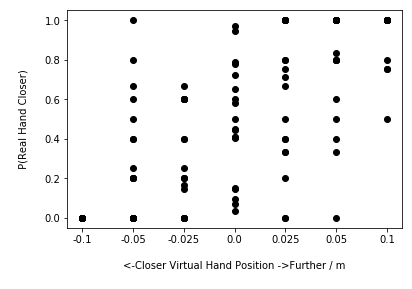

In [480]:
print(resultDF2)
# lines = resultDF2.plot.line()

for index, row in resultDF2.iterrows():
    vals = (row['P-0.1'], row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])
    plt.plot(vals,'ko')

xVals = np.arange(len(proprioceptiveVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [481]:
# print(resultDF2['P-0.1'] + random.uniform(0.0, 0.05))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
JND:  0.01
JND:  0.018
JND:  0.008
JND:  0.028
JND:  0.022
JND:  0.032
JND:  0.037
JND:  0.076
JND:  0.061
JND:  0.013
JND:  0.041
JND:  0.027
JND:  0.003
JND:  0.032
JND:  0.083
JND:  0.024
JND:  0.021
JND:  0.058
JND:  0.048


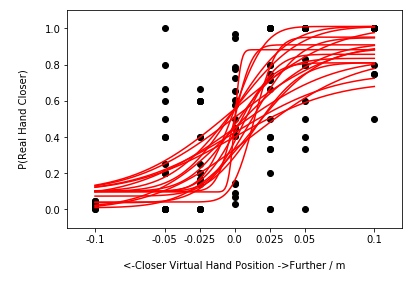

In [536]:
# Curve fitting part 
xVals = np.arange(len(proprioceptiveVals)) # This doesn't change
# xVals = np.pad(xVals, (1, 1), 'edge')
x = proprioceptiveVals
print(x)
yCurves = []
yVals = []
jnd = []
pseVal = []

for index, row in resultDF2.iterrows():

    vals = (row['P-0.1'] + random.uniform(0.0, 0.05), row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])

    # choose the input and output variables
    y = vals #+ random.uniform(0.0, 0.05)
#     y = np.pad(vals, (1, 1), 'edge')
    
    yVals.append(y)
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=10000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # plot input vs output
    plt.scatter(x, y,color=[0,0,0])

    # define a sequence of inputs between the smallest and largest known inputs
#     x_line = np.arange(min(x), max(x)+1, 0.1)
    x_line = np.arange(min(x), max(x)+0.001, 0.001)


    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = x_line[pidx]
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)
    jnd.append(jndVal)
    pseVal.append(pse)
    print("JND: ", jndVal)
    
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '-', color='red')
    yCurves.append(y_line)
    
    
# # plt.legend(['Fitted Curve','Data Points']
plt.ylim([-0.1,1.1])
plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [539]:
# Average JND Sensitivity to visual-proprioceptive errors
averageJND = np.round(np.mean(jnd),4)
medianJND = np.round(np.median(jnd),4)
stdErr = np.round(np.std(jnd, axis=0)/np.sqrt(len(jnd)),4)
minJND = np.round(np.min(jnd),4)
maxJND = np.round(np.max(jnd),4)

averagePSE = np.round(np.mean(pseVal),4)
stdErrPSE = np.round(np.std(pseVal, axis=0)/np.sqrt(len(pseVal)),4)
print("The average PSE bias in visual-proprioceptive error is: ", averagePSE*100, "SE:", stdErrPSE*100,"cm")

print("The average JND to visual-proprioceptive error is: ", averageJND*100, "SE:", stdErr*100,"cm")
print("The medial JND is: ", np.round(medianJND*100,4), "cm")
print("The min JND is: ", minJND*100, "cm and the max JND is: ", maxJND*100,"cm")

The average PSE bias in visual-proprioceptive error is:  0.74 SE: 0.24 cm
The average JND to visual-proprioceptive error is:  3.38 SE: 0.5 cm
The medial JND is:  2.8 cm
The min JND is:  0.3 cm and the max JND is:  8.3 cm


In [483]:
popt

array([1.43672365e-12, 5.60000000e-02, 8.17174092e-01, 1.00000000e-01])

(19, 201)


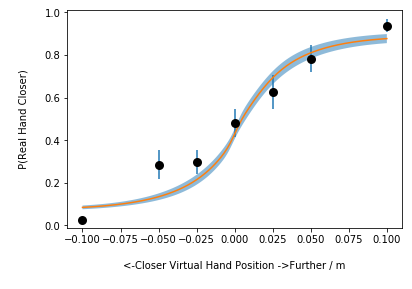

In [565]:
#----------------------------------------
#----------- # Average curve ------------
#----------------------------------------
curveArrShape = np.shape(yCurves)
print(curveArrShape)

# plt.figure()
yValsMean = np.mean(yVals, axis=0)  
yValsSE = np.round(np.std(yVals, axis=0)/np.sqrt(len(yVals)),4)
plt.errorbar(x, yValsMean, yValsSE,marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

ydata = np.mean(yCurves, axis=0)
yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
plt.plot(x_line, ydata)
plt.fill_between(x_line, ydata-yerr, ydata+yerr, alpha=0.5)
# plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.ylim([-0.01, 1.01])
plt.show()

In [221]:
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
print(df)

for index, row in df.iterrows():
    print(row['c1'], row['c2'])

   c1   c2
0  10  100
1  11  110
2  12  120
10 100
11 110
12 120


In [ ]:
# This computes how many times the answer was correct (1) and incorrect (0) for each of the proprioceptive values accross all participants
group1 = dataFrame.groupby('ProprioceptiveVal')
df2 = grou
p1.apply(lambda x: x['Answer'].value_counts())
df2

Array:  [133  81 131  80 141  89 222 139   9 146   6 159   5  13]
Total length:  14
Rows:  7
Probabilty Values:  [0.621, 0.621, 0.613, 0.385, 0.942, 0.964, 0.722]


Text(0,0.5,'\n P(Virthal Hand Closer) \n')

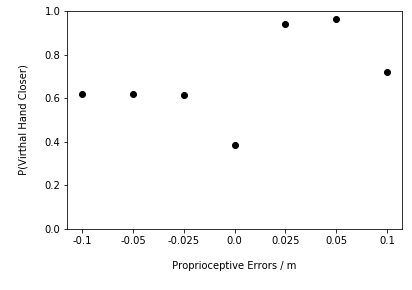

In [254]:
df2l = df2.tolist()

df2ll=np.arange(14)
i = 0
c = 0
for idx,val in enumerate(df2l):
#     if idx % 2 == 0 and idx != 0:
#         continue
    if i == 2:
        i = 0
        continue
    
#     print(idx, ' ', val)
    df2ll[c] = val
    c+=1
    
    i+=1
    
# Get rid of 3rd element of each df2l value 
print("Array: " , (df2ll))
print("Total length: " , len(df2ll))

rows = int(len(df2ll)/2)
print("Rows: ", rows)
columns = 2
df2arr = np.reshape(df2ll,(rows,columns))

propVals = []
for i in range(len(df2arr)):
    lenArr = sum(df2arr[i])
#     print(df2arr[i][0] / lenArr)
    probV = np.round(df2arr[i][0] / lenArr,3)
    if i<3:
        propVals.append(probV)
    else:
        propVals.append(1.0-probV)


print("Probabilty Values: ", propVals)
plt.plot(propVals,'ko')
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")

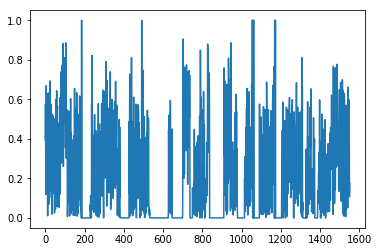

In [255]:
# Plot difference betweeen the real and virtual hand throughout the task 
r2vDiff = []
for i, row in dataFrame.iterrows():
    r2vDiff.append(row['Real2VirtHandDiff']) 
plt.plot(r2vDiff)

In [ ]:
# Curve fitting part 

# choose the input and output variables
x = xVals
y = propVals

# curve fit
# popt, _ = curve_fit(objectiveSig, x, y)
popt, _ = curve_fit(func5, x, y)

# summarize the parameter values
# a, b, c, d, e, f = popt
a, b, c, d, e, f = popt

# plot input vs output
plt.scatter(x, y,color=[0,0,0])

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
# y_line = objective(x_line, a, b, c, d, e, f)
# y_line = objectiveSig(x_line, a, b)
y_line = func5(x_line, a, b, c, d, e, f)



# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
plt.legend(['Fitted Curve','Data Points'])
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import scipy as sy
import matplotlib.pyplot as plt

d = np.array([75, 80, 90, 95, 100, 105, 110, 115, 120, 125], dtype=float)
p2 = np.array([6, 13, 25, 29, 29, 29, 30, 29, 30, 30], dtype=float) / 30. # scale to 0..1

# psychometric function
def pf(x, alpha, beta):
    return 1. / (1 + np.exp( -(x-alpha)/beta ))

# fitting
par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]
par, mcov = curve_fit(pf, d, p2, par0)
print(par)
plt.plot(d, p2, 'ro')
plt.plot(d, pf(d, par[0], par[1]))
plt.show()